In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [19]:
import pandas
from pyndamics import *
from pyndamics.emcee import *

In [20]:
data=pandas.read_excel('data/Sierra.xlsx')
data

,Date,Days,Cases,Deaths
0,"Jan 06, 2016",659,14122,3955
1,"Dec 30, 2015",652,14122,3955
2,"Dec 23, 2015",645,14122,3955
3,"Dec 16, 2015",638,14122,3955
4,"Dec 9, 2015",631,14122,3955
5,"Dec 2, 2015",624,14122,3955
6,"Nov 25, 2015",617,14122,3955
7,"Nov 18, 2015",610,14122,3955
8,"Nov 11, 2015",603,14122,3955
9,"Nov 4, 2015",596,14089,3955


In [21]:
t_data=data['Days']
X_data=data['Deaths']
C_data=data['Cases']

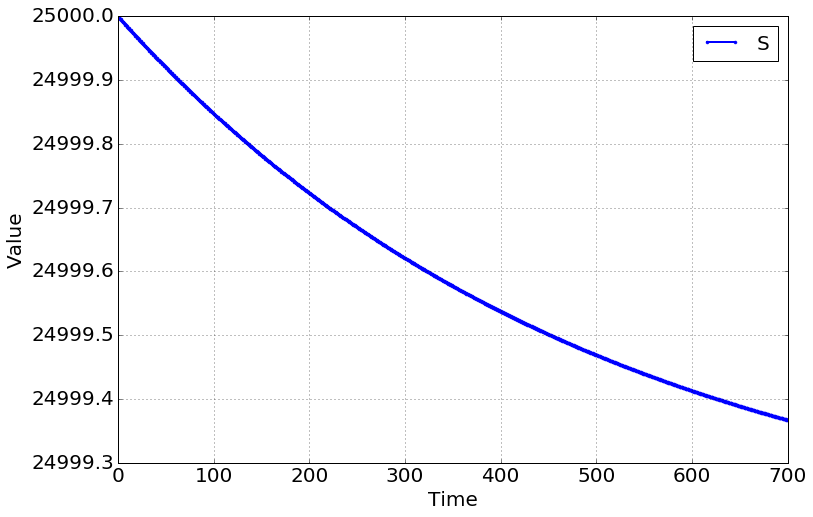

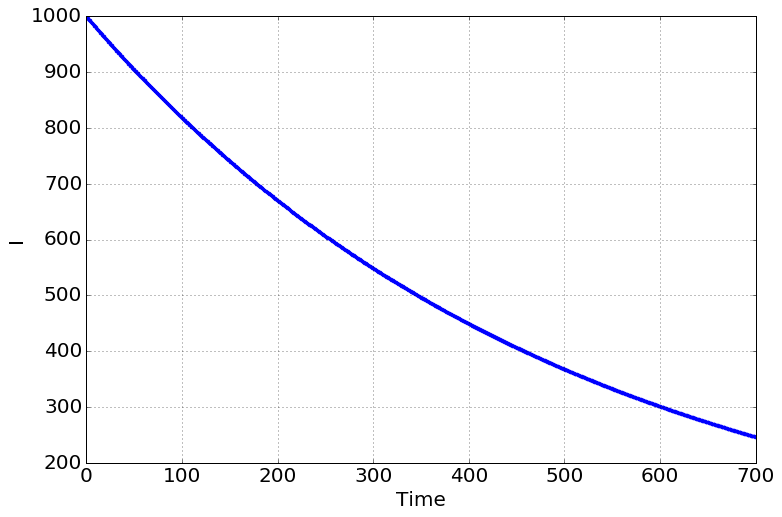

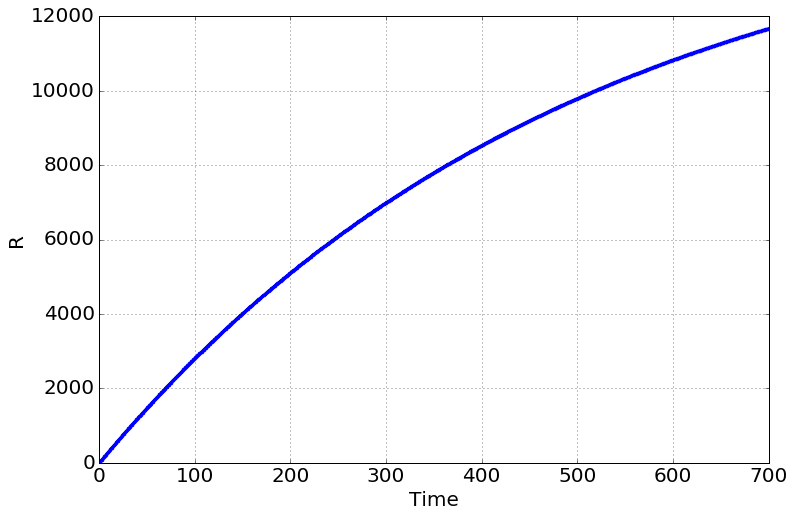

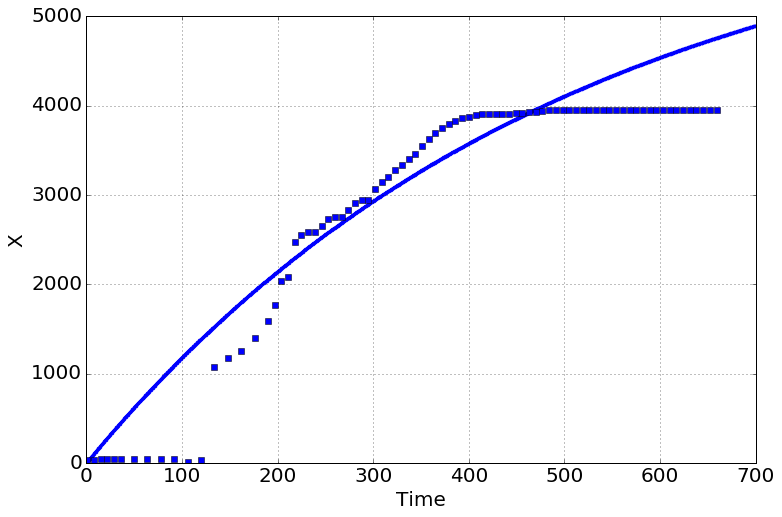

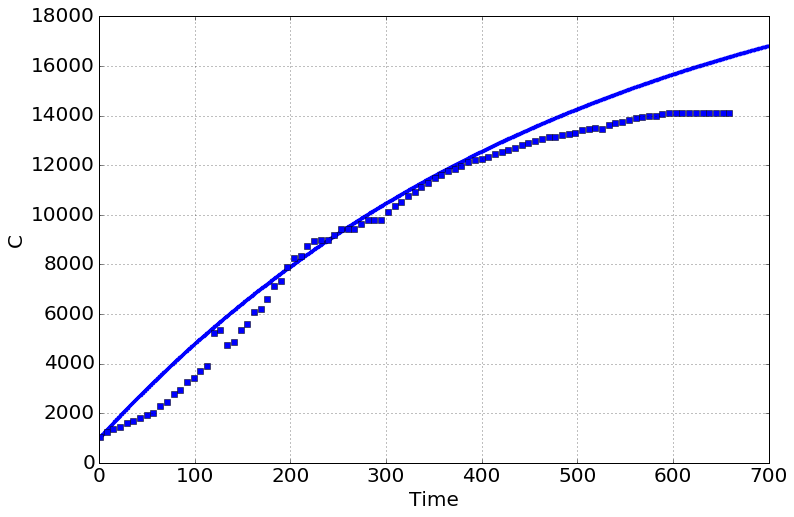

In [22]:
sim=Simulation()
sim.add("S'=-beta*S*I/25000",25000,plot=True)
sim.add("I'=beta*S*I-zeta*I-alpha*I",1000,plot=True)
sim.add("R'=zeta*I",0,plot=True)
sim.add("X'=alpha*I",0,plot=True)
sim.add("C=I+R+X",plot=True)
sim.params(beta=1.68e-6,zeta=.031,alpha=.013)
sim.add_data(t=t_data,X=X_data,plot=True)
sim.add_data(t=t_data,C=C_data,plot=True)
sim.run(0,700)

Sampling Prior...
Done.
1.55 s
Running MCMC...
Done.
9 m, 58.82 s


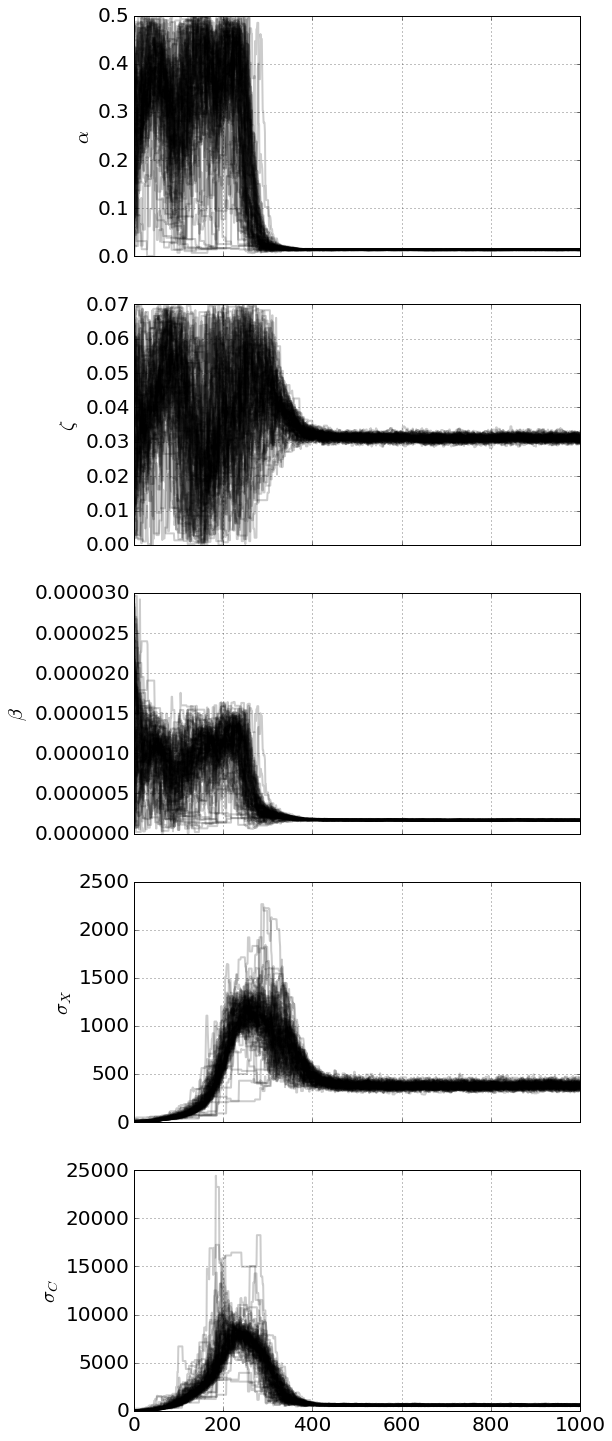

In [23]:
model=MCMCModel(sim,
                alpha=Uniform(0,.5),
                beta=Uniform(0,.0000298),
                zeta=Uniform(0,.07)
                )
model.run_mcmc(1000)
model.plot_chains()

Running MCMC...
Done.
8 m, 29.14 s


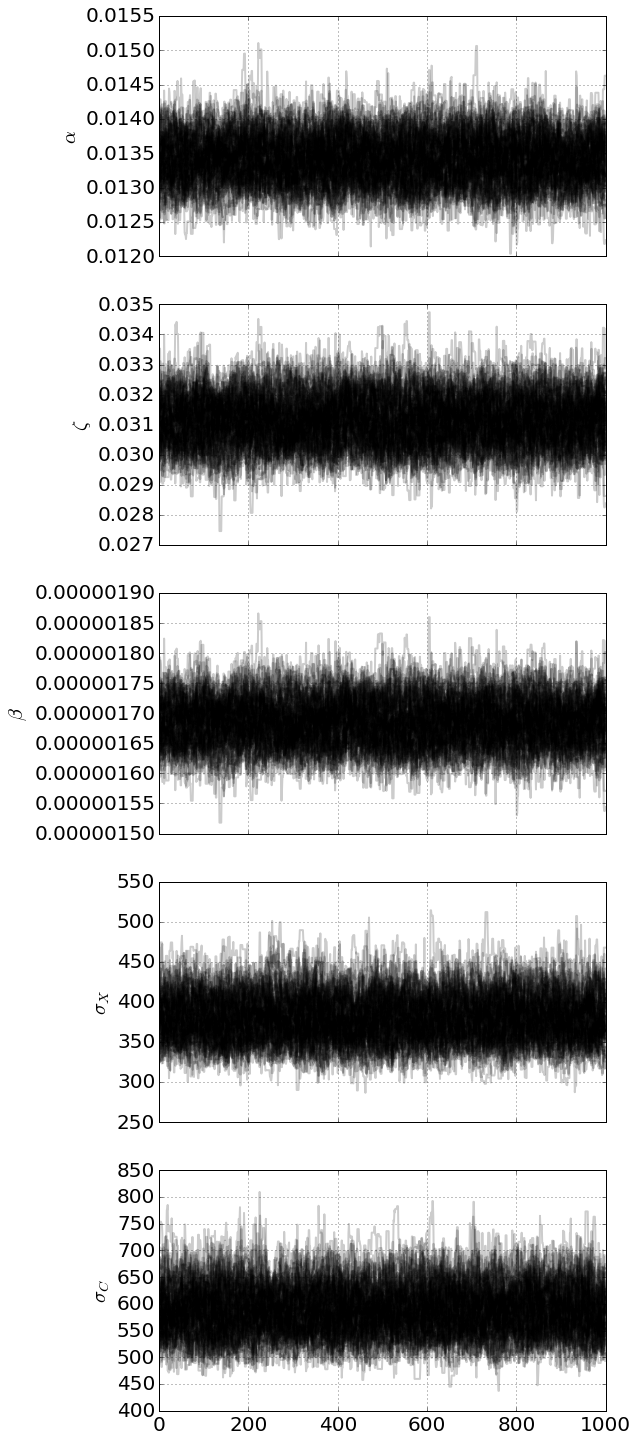

In [24]:
model.run_mcmc(1000)
model.plot_chains()

Running MCMC...
Done.
8 m, 18.22 s


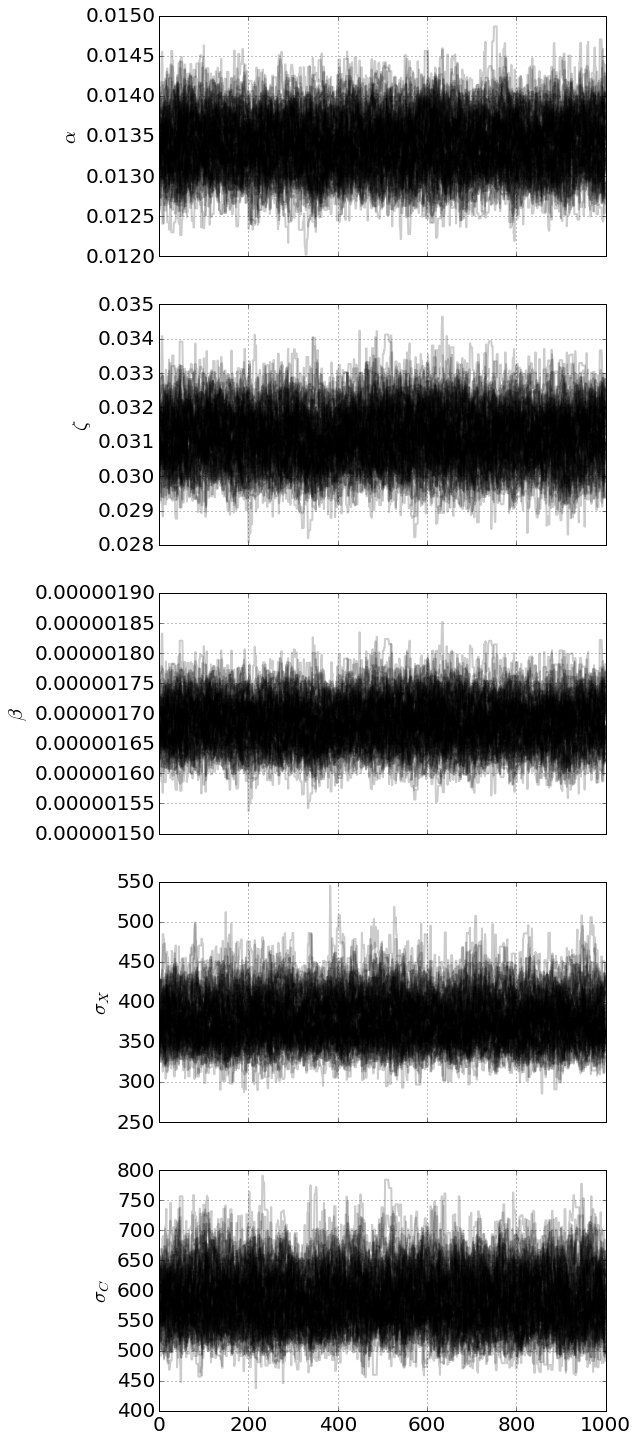

In [25]:
model.set_initial_values('samples')
model.run_mcmc(1000)
model.plot_chains()

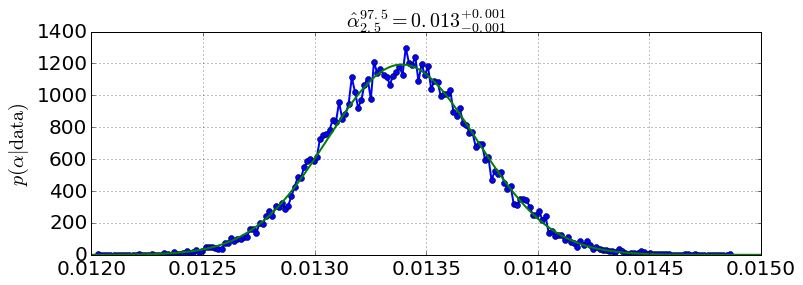

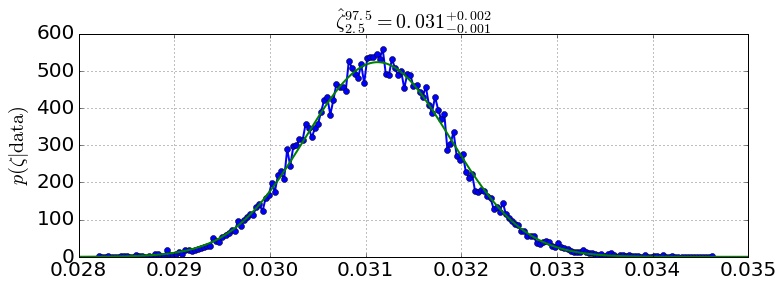

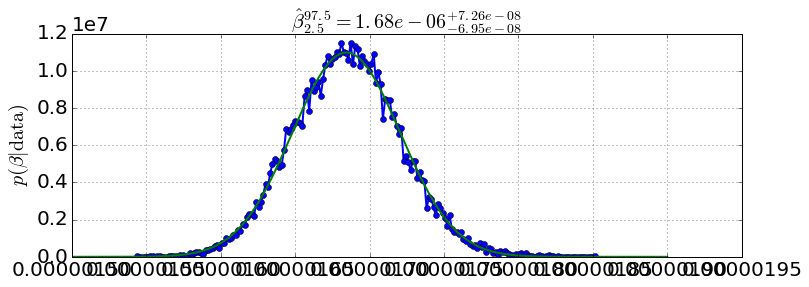

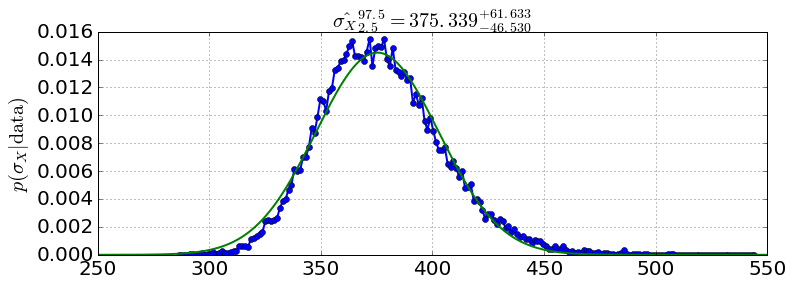

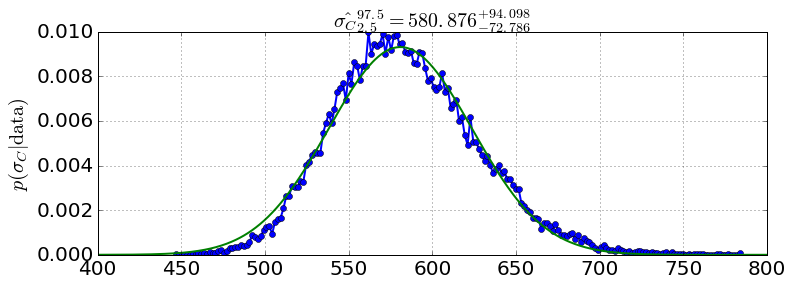

In [26]:
model.plot_distributions()

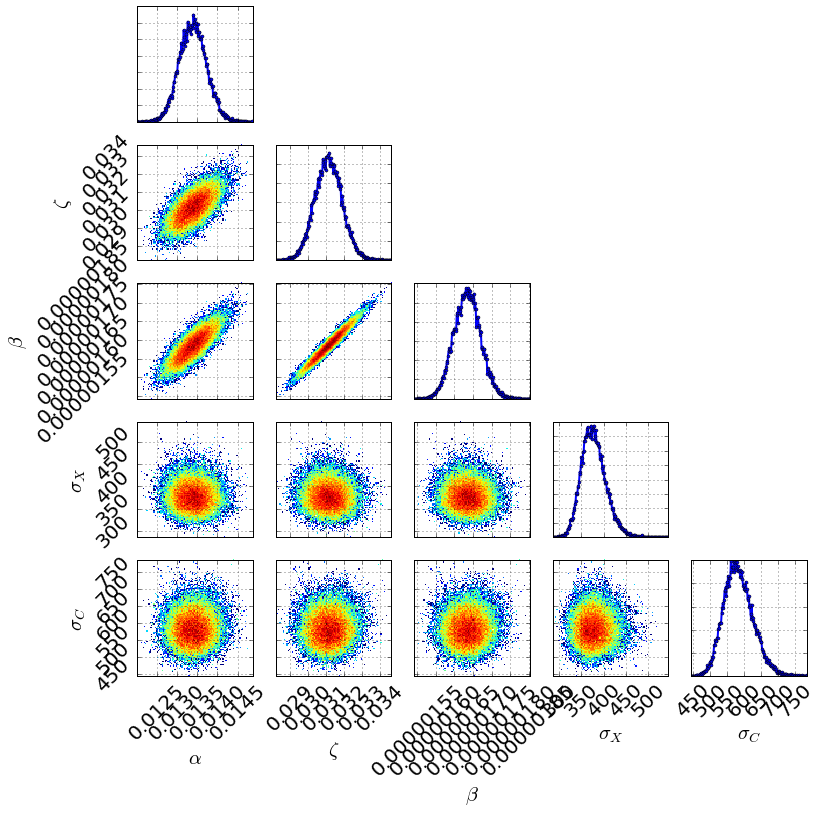

In [27]:
model.triangle_plot()

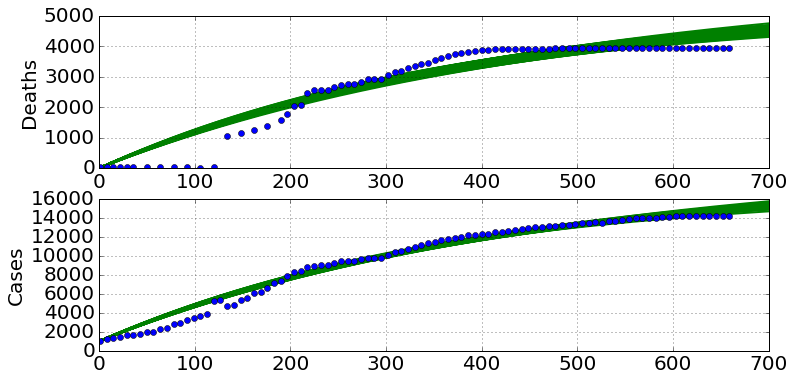

In [28]:
figure(figsize=(12,6))
sim.noplots=True  # turn off the simulation plots
for i in range(500):
    model.draw()
    sim.run(0,700)
    subplot(2,1,1)
    plot(sim.t,sim.X,'-g')
    subplot(2,1,2)
    plot(sim.t,sim.C,'-g')
sim.noplots=False  # gotta love a double-negative

subplot(2,1,1)
plot(t_data,X_data,'bo')  # plot the data
ylabel('Deaths')

subplot(2,1,2)
plot(t_data,C_data,'bo')  # plot the data
ylabel('Cases')


Break in the predictions, Now testing the Theory

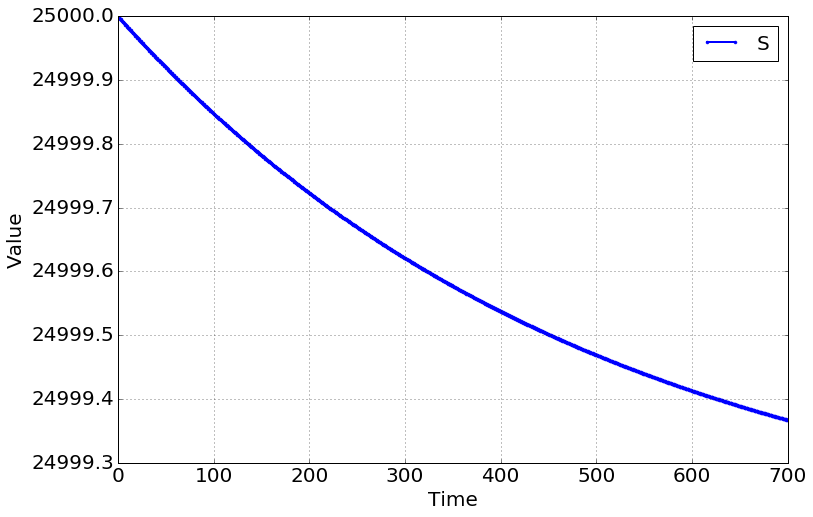

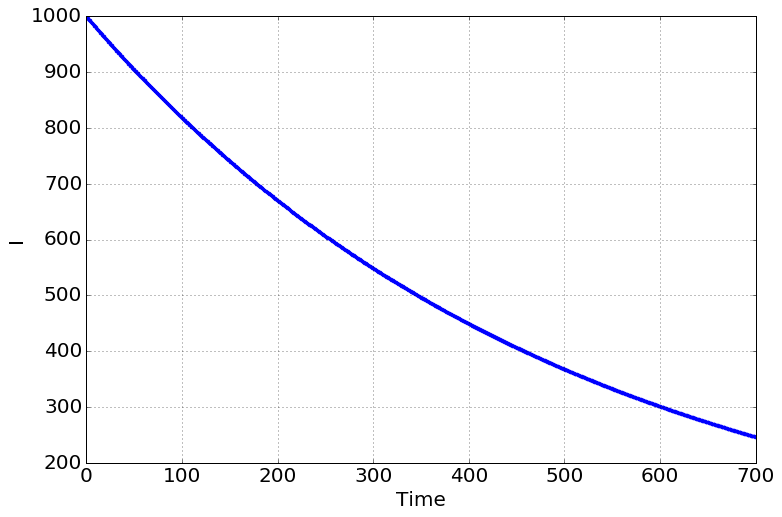

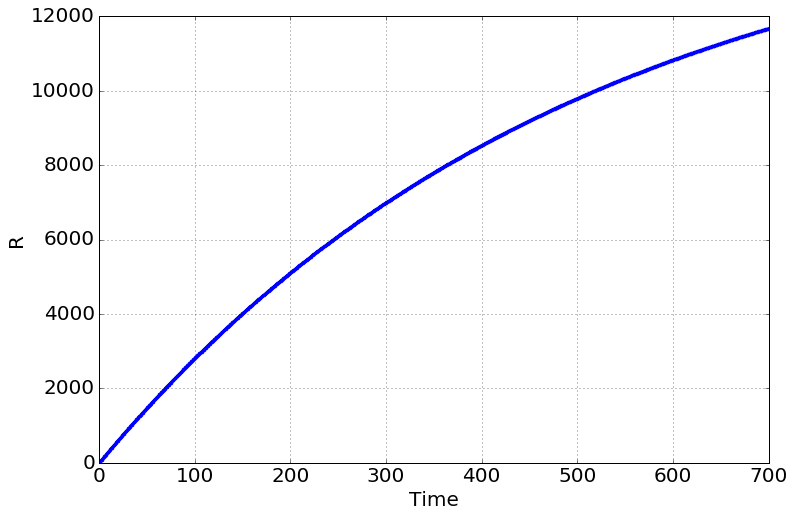

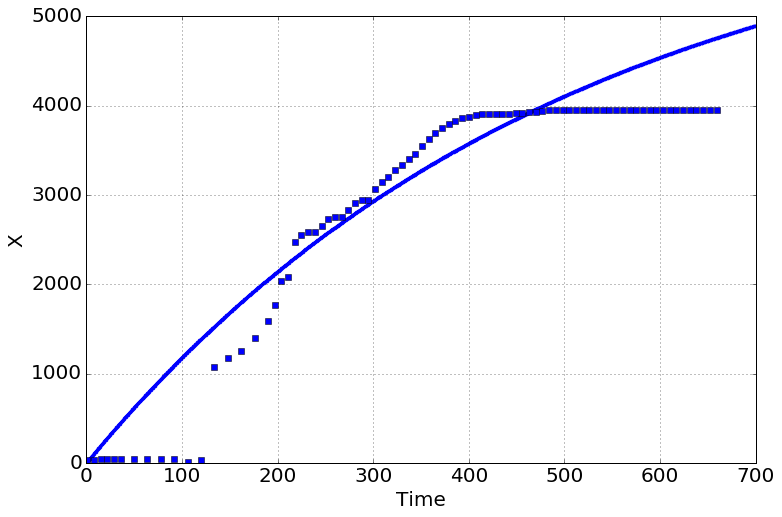

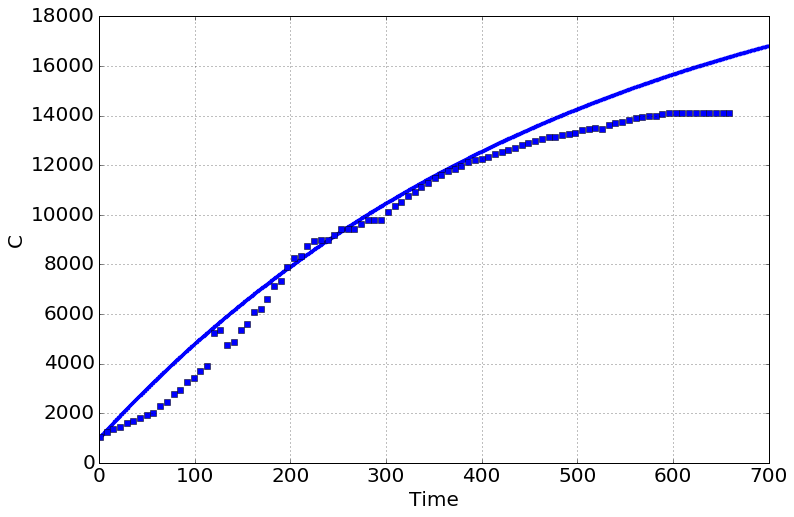

In [29]:
sim=Simulation()
sim.add("S'=-beta*S*I/25000",25000,plot=True)
sim.add("I'=beta*S*I-zeta*I-alpha*I",1000,plot=True)
sim.add("R'=zeta*I",0,plot=True)
sim.add("X'=alpha*I",0,plot=True)
sim.add("C=I+R+X",plot=True)
sim.params(beta=1.68e-6,zeta=.031,alpha=.013)
sim.add_data(t=t_data,X=X_data,plot=True)
sim.add_data(t=t_data,C=C_data,plot=True)
sim.run(0,700)